## Data Analysis For Attendance

In [21]:
# import 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load file 

In [11]:
file_path = "SampleData/OperatingSystem.xls"

df = pd.read_excel(file_path)
print(df.head())

   Sl No. Roll Number 10/02/2025 09/02/2025 Attendance Attendance %
0       1   IT2021038          A          P        1/2          50%
1       2   IT2021026          A          P        1/2          50%
2       3   IT2021050          A          A        0/2           0%


### Data Pre Processing 

In [12]:
# indentify attendance columns 

attendance_columns = df.columns[2:-2]
print("Attendance Columns:", attendance_columns)


Attendance Columns: Index(['10/02/2025', '09/02/2025'], dtype='object')


In [17]:
# Convert 'P' to 1 and 'A' to 0
df[attendance_columns] = df[attendance_columns].replace({'P': 1, 'A': 0})

# Calculate total present days
df['Total Present'] = df[attendance_columns].sum(axis=1)

# Calculate total classes conducted
total_classes = len(attendance_columns)
df['Total Classes'] = total_classes

# Calculate Attendance Percentage
df['Attendance %'] = (df['Total Present'] / total_classes) * 100

print(df[['Roll Number', 'Total Present', 'Total Classes', 'Attendance %']])


  Roll Number  Total Present  Total Classes  Attendance %
0   IT2021038              1              2          50.0
1   IT2021026              1              2          50.0
2   IT2021050              0              2           0.0


## Analysis 

### Find Students Below a Certain Attendance Threshold 

In [18]:
low_attendance = df[df['Attendance %'] < 75] # Filter rows where Attendance % is less than 75%
print(low_attendance[['Roll Number', 'Total Present', 'Total Classes', 'Attendance %']])

  Roll Number  Total Present  Total Classes  Attendance %
0   IT2021038              1              2          50.0
1   IT2021026              1              2          50.0
2   IT2021050              0              2           0.0


### Find Average Attendance of Class

In [19]:
average_attendance = df['Attendance %'].mean()
print("Average Attendance Percentage:", average_attendance)

Average Attendance Percentage: 33.333333333333336


### Find the Most Absent Day

In [20]:
most_absent_day = df[attendance_columns].sum().idxmin()

print(f"The most absent day is: {most_absent_day}")

The most absent day is: 10/02/2025


## Visualizing the Data

### Stundent-Wise Attendance 

/tmp/ipykernel_19373/1726224348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Roll Number'], y=df['Attendance %'], palette=colors)


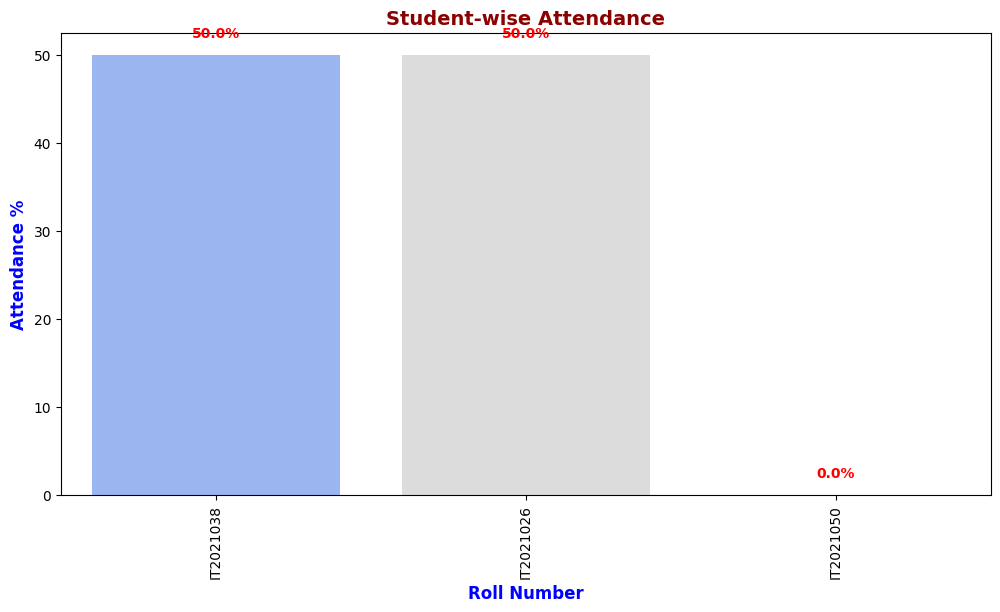

In [26]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(df))
sns.barplot(x=df['Roll Number'], y=df['Attendance %'], palette=colors)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Roll Number", fontsize=12, fontweight='bold', color='blue')
plt.ylabel("Attendance %", fontsize=12, fontweight='bold', color='blue')
plt.title("Student-wise Attendance", fontsize=14, fontweight='bold', color='darkred')


for i, p in enumerate(df['Attendance %']):
    if p < 75:
        plt.text(i, p + 2, f"{p:.1f}%", ha='center', fontsize=10, color='red', fontweight='bold')

plt.show()

### Individual Stundent Attendance 

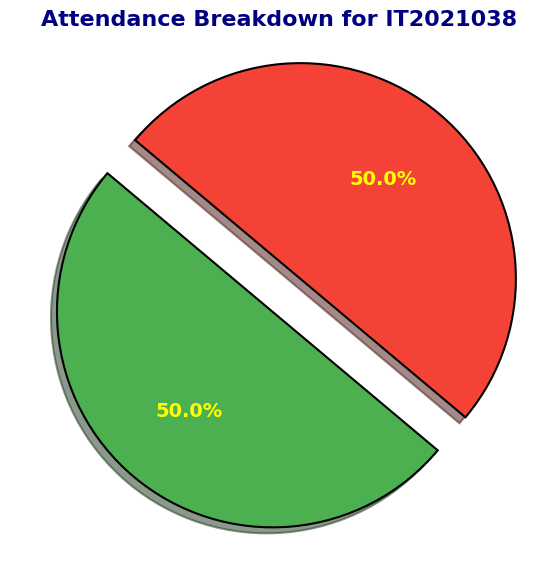

In [36]:

def student_attendance_pie(roll_no):
    student = df[df['Roll Number'] == roll_no]
    if student.empty:
        print("Student not found!")
        return

    present_days = student['Total Present'].values[0]
    absent_days = student['Total Classes'].values[0] - present_days


    colors = ['#4CAF50', '#F44336']
    
    explode = [0.05, 0.15]  

    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        [present_days, absent_days], 
        labels=['Present', 'Absent'],
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        explode=explode, 
        shadow=True, 
        textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'white'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )

    for text in texts:
        text.set_fontsize(12)
        text.set_fontweight('bold')

    
    for autotext in autotexts:
        autotext.set_color('yellow')
        autotext.set_fontsize(14)
        autotext.set_fontweight('bold')

    
    plt.title(f"Attendance Breakdown for {roll_no}", fontsize=16, fontweight='bold', color='navy')

    plt.show()


student_attendance_pie("IT2021038")


### Daily Class Attendance Trend 

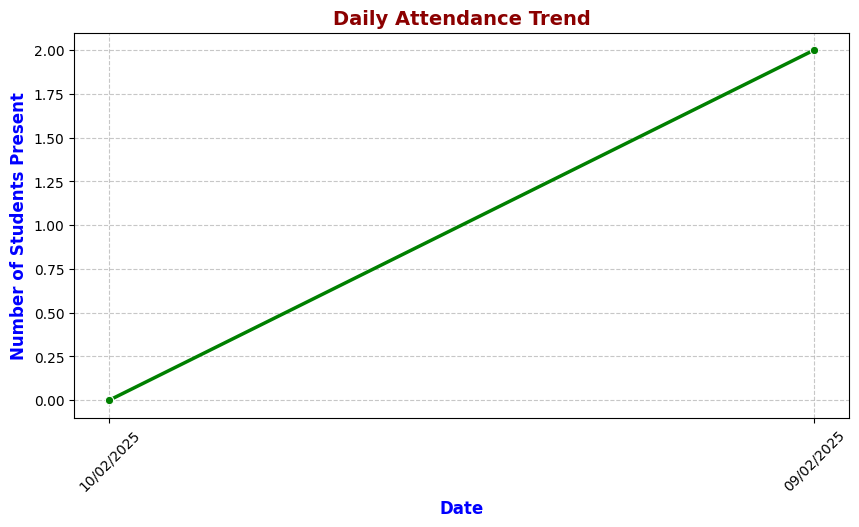

In [32]:
daily_attendance = df[attendance_columns].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_attendance.index, y=daily_attendance.values, marker='o', color='green', linewidth=2.5)

plt.xlabel("Date", fontsize=12, fontweight='bold', color='blue')
plt.ylabel("Number of Students Present", fontsize=12, fontweight='bold', color='blue')
plt.title("Daily Attendance Trend", fontsize=14, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()
